In [4]:
import cv2
import matplotlib.pyplot as plt
import csv
import os

# Path to the directory containing the images
image_dir = './train/haiper/bike/images_full/'

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Create a Brute-Force Matcher
bf = cv2.BFMatcher()

# Number of nearest neighbors to match
k = 2

# Iterate through pairs of images
for gap in range(1, 11): # within window=10, do feature matching
    for i in range(151):
        j = i + gap
        if(j > 150): continue
        print(i, j)
        # Load two consecutive images
        image1_path = f'{image_dir}image_{i:03d}.jpeg'
        image2_path = f'{image_dir}image_{j:03d}.jpeg'

        image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
        image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

        # Find keypoints and compute descriptors for both images
        keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
        keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

        # Match descriptors using KNN
        matches = bf.knnMatch(descriptors1, descriptors2, k)

        # Apply ratio test to get good matches
        good_matches = []
        matched_points = []  # Store (u1, v1, u2, v2)

        for m, n in matches:
            if m.distance < 0.75 * n.distance:
                p1 = keypoints1[m.queryIdx].pt
                p2 = keypoints2[m.trainIdx].pt
                good_matches.append(m)
                matched_points.append((p1[0], p1[1], p2[0], p2[1]))

        # Save the matched points to a CSV file
        file_path = f'./matched_points_{i:03d}_{j:03d}.csv'
        file_path = os.path.join('./matched_points', file_path)

        with open(file_path, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(['u1', 'v1', 'u2', 'v2'])  # Write header
            csv_writer.writerows(matched_points)

        # Optional: Display the matching result for the current image pair
        # matching_result = cv2.drawMatches(
        #     image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        # plt.figure(figsize=(12, 6))
        # plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()


0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 74
74 75
75 76
76 77
77 78
78 79
79 80
80 81
81 82
82 83
83 84
84 85
85 86
86 87
87 88
88 89
89 90
90 91
91 92
92 93
93 94
94 95
95 96
96 97
97 98
98 99
99 100
100 101
101 102
102 103
103 104
104 105
105 106
106 107
107 108
108 109
109 110
110 111
111 112
112 113
113 114
114 115
115 116
116 117
117 118
118 119
119 120
120 121
121 122
122 123
123 124
124 125
125 126
126 127
127 128
128 129
129 130
130 131
131 132
132 133
133 134
134 135
135 136
136 137
137 138
138 139
139 140
140 141
141 142
142 143
143 144
144 145
145 146
146 147
147 148
148 149
149 150
0 2
1 3
2 4
3 5
4 

86 95
87 96
88 97
89 98
90 99
91 100
92 101
93 102
94 103
95 104
96 105
97 106
98 107
99 108
100 109
101 110
102 111
103 112
104 113
105 114
106 115
107 116
108 117
109 118
110 119
111 120
112 121
113 122
114 123
115 124
116 125
117 126
118 127
119 128
120 129
121 130
122 131
123 132
124 133
125 134
126 135
127 136
128 137
129 138
130 139
131 140
132 141
133 142
134 143
135 144
136 145
137 146
138 147
139 148
140 149
141 150
0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
10 20
11 21
12 22
13 23
14 24
15 25
16 26
17 27
18 28
19 29
20 30
21 31
22 32
23 33
24 34
25 35
26 36
27 37
28 38
29 39
30 40
31 41
32 42
33 43
34 44
35 45
36 46
37 47
38 48
39 49
40 50
41 51
42 52
43 53
44 54
45 55
46 56
47 57
48 58
49 59
50 60
51 61
52 62
53 63
54 64
55 65
56 66
57 67
58 68
59 69
60 70
61 71
62 72
63 73
64 74
65 75
66 76
67 77
68 78
69 79
70 80
71 81
72 82
73 83
74 84
75 85
76 86
77 87
78 88
79 89
80 90
81 91
82 92
83 93
84 94
85 95
86 96
87 97
88 98
89 99
90 100
91 101
92 102
93 103
94 104
95 105

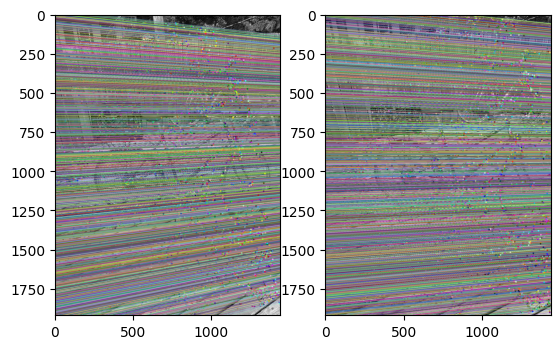

In [5]:
import cv2
import matplotlib.pyplot as plt
import csv
import os
import numpy as np

def estimateTransform(i, j):
    # Path to the CSV file
    csv_file_path = f'./matched_points/matched_points_{i:03d}_{j:03d}.csv'
    
    # Initialize lists to store the values
    pts1 = []
    pts2 = []

    # Open the CSV file for reading
    with open(csv_file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip the header row
        next(csv_reader)

        # Read and store the values from each row
        for row in csv_reader:
            u1, v1, u2, v2 = map(float, row)
            pts1.append([u1, v1])
            pts2.append([u2, v2])
            
    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
    # We select only inlier points
    pts1 = pts1[mask.ravel()==1]
    pts2 = pts2[mask.ravel()==1]
    img1 = cv2.imread(f'./train/haiper/bike/images_full/image_{i:03d}.jpeg', cv2.IMREAD_GRAYSCALE)  #queryimage # left image
    img2 = cv2.imread(f'./train/haiper/bike/images_full/image_{j:03d}.jpeg', cv2.IMREAD_GRAYSCALE) #trainimage # right image
 
    def drawlines(img1,img2,lines,pts1,pts2):
        ''' img1 - image on which we draw the epilines for the points in img2
            lines - corresponding epilines '''
        r,c = img1.shape
        img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
        img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
        for r,pt1,pt2 in zip(lines,pts1,pts2):
            color = tuple(np.random.randint(0,255,3).tolist())
            x0,y0 = map(int, [0, -r[2]/r[1] ])
            x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
            img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
            img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
            img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
        return img1,img2
    # Find epilines corresponding to points in right image (second image) and
    # drawing its lines on left image
    lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
    lines1 = lines1.reshape(-1,3)
    img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
    # Find epilines corresponding to points in left image (first image) and
    # drawing its lines on right image
    lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
    lines2 = lines2.reshape(-1,3)
    img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
    plt.subplot(121),plt.imshow(img5)
    plt.subplot(122),plt.imshow(img3)
    plt.show()

estimateTransform(0, 1)